<a href="https://colab.research.google.com/github/Mootha-sri-harshit/ML/blob/main/Drug_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MOOTHA SRI HARSHIT 2022BCS0096
BHUVAN 2022BEC0033


Importing Libraries

In [136]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

Reading Data Set

In [137]:
df_drug = pd.read_csv("drug200.csv")

 Read the first 6 rows in the dataset.

In [138]:
df_drug.head()


,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


 Data type and checking null in dataset.

In [139]:
print(df_drug.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB
None


Initial Dataset Exploration

Categorical Variables

In [140]:
df_drug.Drug.value_counts()

,count
Drug,
DrugY,91
drugX,54
drugA,23
drugC,16
drugB,16


In [141]:
df_drug.Sex.value_counts()

,count
Sex,
M,104
F,96


In [142]:
df_drug.BP.value_counts()

,count
BP,
HIGH,77
LOW,64
NORMAL,59


In [143]:
df_drug.Cholesterol.value_counts()

,count
Cholesterol,
HIGH,103
NORMAL,97


Numerical Variables

In [144]:
df_drug.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [145]:
skewAge = df_drug.Age.skew(axis = 0, skipna = True)
print('Age skewness: ', skewAge)

Age skewness:  0.03030835703000607


In [146]:
skewNatoK = df_drug.Na_to_K.skew(axis = 0, skipna = True)
print('Na to K skewness: ', skewNatoK)

Na to K skewness:  1.039341186028881


<ipython-input-147-b63208141c63>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_drug['Age']);


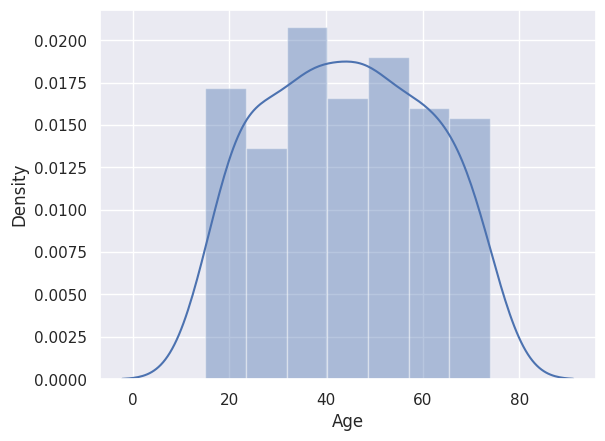

In [147]:
sns.distplot(df_drug['Age']);

<ipython-input-148-cbf3664b68d6>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_drug['Na_to_K']);


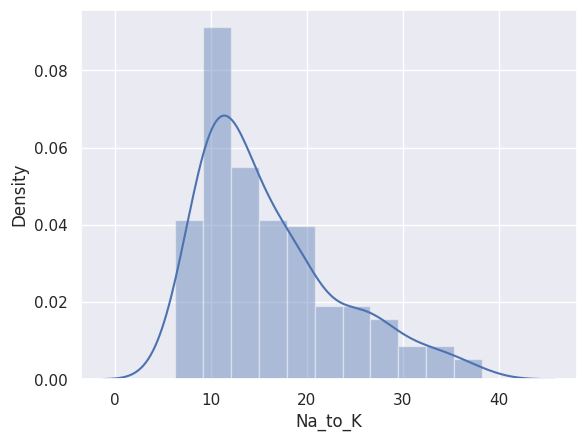

In [148]:
sns.distplot(df_drug['Na_to_K']);

explore variables in the dataset using different various plots/charts.

Drug type distribution

<ipython-input-149-bcf253f0154b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="Drug", data=df_drug, palette="flare")


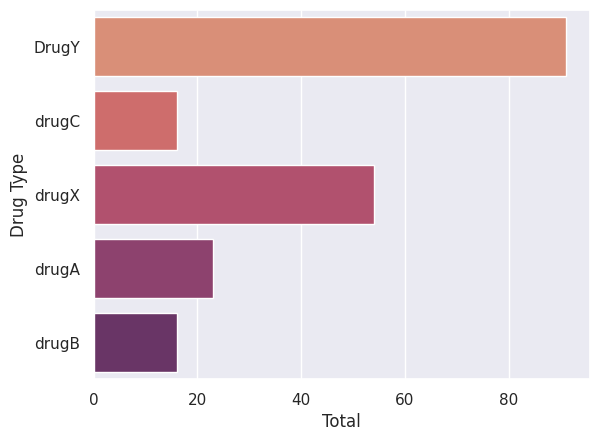

In [149]:
sns.set_theme(style="darkgrid")
sns.countplot(y="Drug", data=df_drug, palette="flare")
plt.ylabel('Drug Type')
plt.xlabel('Total')
plt.show()

Gender Distribution


<ipython-input-150-bcf51446a01a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Sex", data=df_drug, palette="rocket")


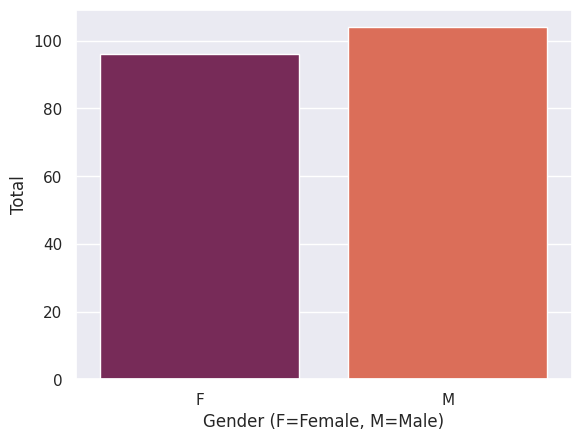

In [150]:
sns.set_theme(style="darkgrid")
sns.countplot(x="Sex", data=df_drug, palette="rocket")
plt.xlabel('Gender (F=Female, M=Male)')
plt.ylabel('Total')
plt.show()

Blood Pressure Distribution

<ipython-input-151-3e4dbb4a4643>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="BP", data=df_drug, palette="crest")


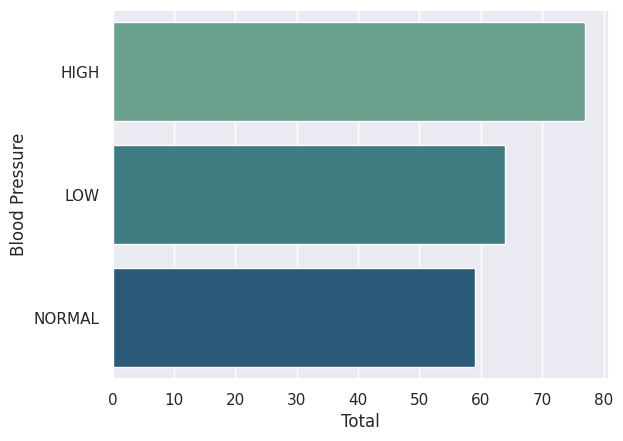

In [151]:
sns.set_theme(style="darkgrid")
sns.countplot(y="BP", data=df_drug, palette="crest")
plt.ylabel('Blood Pressure')
plt.xlabel('Total')
plt.show()

Cholesterol Distribution

<ipython-input-152-7d001ee0b7c7>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Cholesterol", data=df_drug, palette="magma")


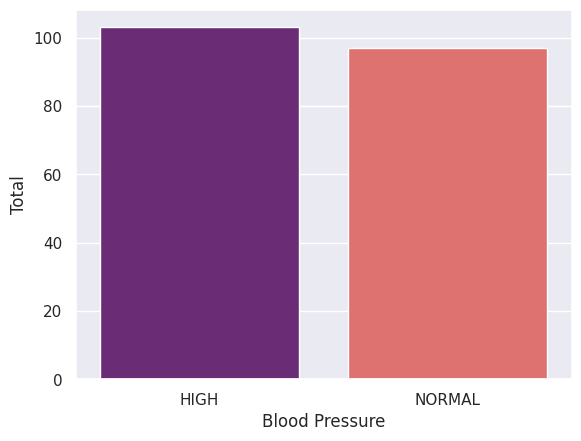

In [152]:
sns.set_theme(style="darkgrid")
sns.countplot(x="Cholesterol", data=df_drug, palette="magma")
plt.xlabel('Blood Pressure')
plt.ylabel('Total')
plt.show()

Gender Distribution based on Drug Type

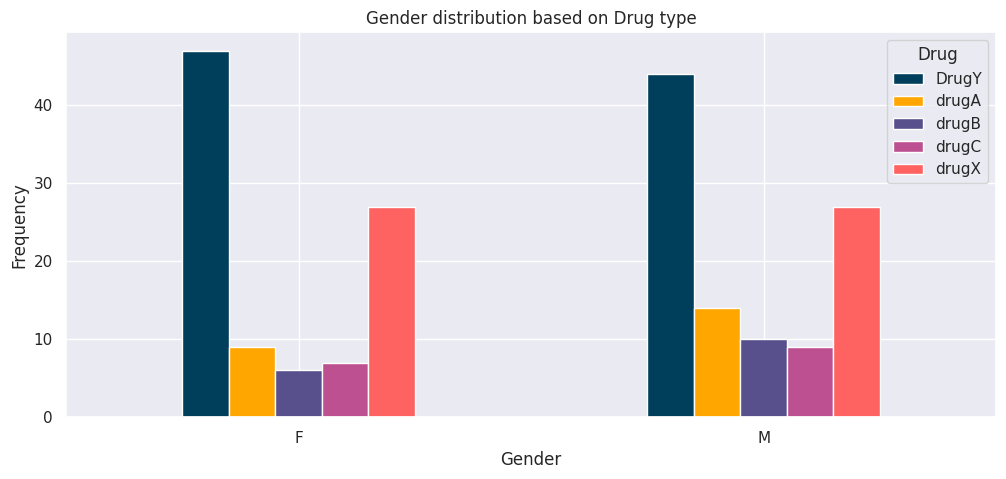

In [153]:
pd.crosstab(df_drug.Sex,df_drug.Drug).plot(kind="bar",figsize=(12,5),color=['#003f5c','#ffa600','#58508d','#bc5090','#ff6361'])
plt.title('Gender distribution based on Drug type')
plt.xlabel('Gender')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

 Blood Pressure Distribution based on Cholesetrol

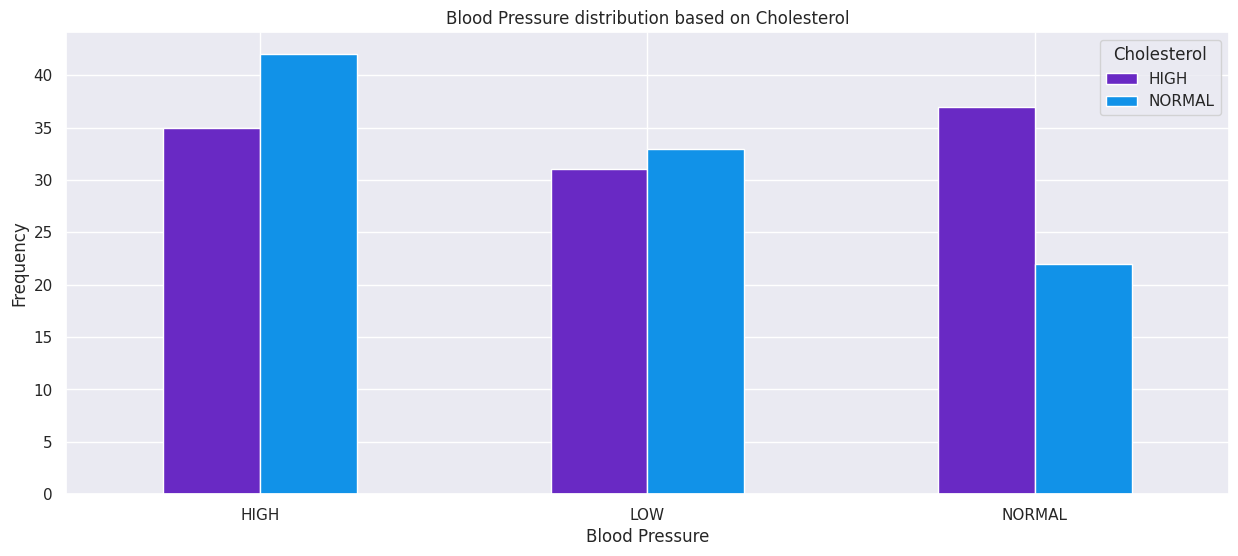

In [154]:
pd.crosstab(df_drug.BP,df_drug.Cholesterol).plot(kind="bar",figsize=(15,6),color=['#6929c4','#1192e8'])
plt.title('Blood Pressure distribution based on Cholesterol')
plt.xlabel('Blood Pressure')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

Sodium to Potassium Distribution based on Gender and Age

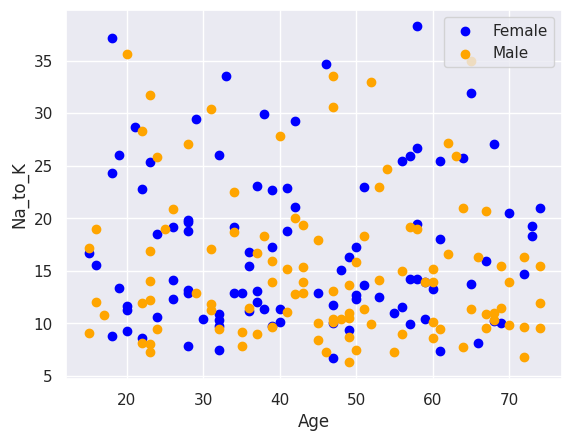

In [155]:
plt.scatter(x=df_drug.Age[df_drug.Sex=='F'], y=df_drug.Na_to_K[(df_drug.Sex=='F')], c="Blue")
plt.scatter(x=df_drug.Age[df_drug.Sex=='M'], y=df_drug.Na_to_K[(df_drug.Sex=='M')], c="Orange")
plt.legend(["Female", "Male"])
plt.xlabel("Age")
plt.ylabel("Na_to_K")
plt.show()

Dataset Preparation


In [156]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [157]:
X = df_drug.drop(["Drug"], axis=1)
y = df_drug["Drug"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

Feature Engineering

In [158]:
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)
X_train.head(),X_test.head()

(     Age  Na_to_K  Sex_F  Sex_M  BP_HIGH  BP_LOW  BP_NORMAL  Cholesterol_HIGH  \
 131   52   32.922  False   True    False    True      False             False   
 96    58   38.247   True  False    False    True      False              True   
 181   59   13.884   True  False    False   False       True              True   
 19    32   25.974   True  False     True   False      False             False   
 153   72   14.642   True  False    False    True      False             False   
 
      Cholesterol_NORMAL  
 131                True  
 96                False  
 181               False  
 19                 True  
 153                True  ,
      Age  Na_to_K  Sex_F  Sex_M  BP_HIGH  BP_LOW  BP_NORMAL  Cholesterol_HIGH  \
 18    23    7.298  False   True    False    True      False              True   
 170   28   12.879   True  False    False   False       True              True   
 107   42   20.013  False   True    False    True      False              True   
 98    20   35.

SMOTE Technique

In [159]:
from imblearn.over_sampling import SMOTE
X_train, y_train = SMOTE().fit_resample(X_train, y_train)

<ipython-input-160-e5421e51f6ca>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=y_train, data=df_drug, palette="mako_r")


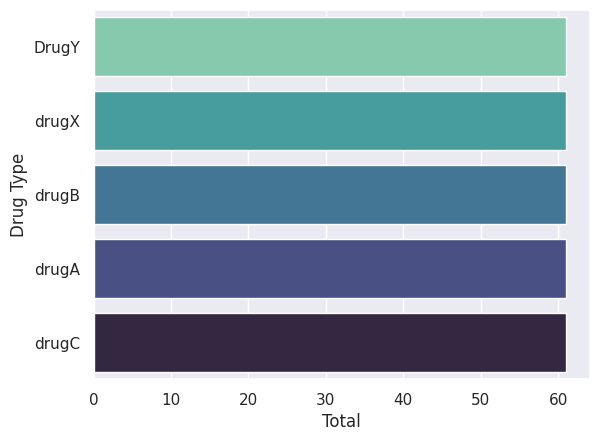

In [160]:
sns.set_theme(style="darkgrid")
sns.countplot(y=y_train, data=df_drug, palette="mako_r")
plt.ylabel('Drug Type')
plt.xlabel('Total')
plt.show()

In [161]:
X_train.head()

,Age,Na_to_K,Sex_F,Sex_M,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL
0,52,32.922,False,True,False,True,False,False,True
1,58,38.247,True,False,False,True,False,True,False
2,59,13.884,True,False,False,False,True,True,False
3,32,25.974,True,False,True,False,False,False,True
4,72,14.642,True,False,False,True,False,False,True


In [162]:
y_train.value_counts()

,count
Drug,
DrugY,61
drugX,61
drugB,61
drugA,61
drugC,61


Models

1 Logistic Regression

In [163]:
from sklearn.linear_model import LogisticRegression
LRclassifier = LogisticRegression(solver='liblinear', max_iter=5000)
LRclassifier.fit(X_train, y_train)

y_pred = LRclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
LRAcc = accuracy_score(y_pred,y_test)
print('Logistic Regression accuracy is: {:.2f}%'.format(LRAcc*100))

              precision    recall  f1-score   support

       DrugY       0.96      0.90      0.93        30
       drugA       1.00      0.80      0.89         5
       drugB       0.60      1.00      0.75         3
       drugC       1.00      1.00      1.00         4
       drugX       0.89      0.94      0.92        18

    accuracy                           0.92        60
   macro avg       0.89      0.93      0.90        60
weighted avg       0.93      0.92      0.92        60

[[27  0  1  0  2]
 [ 0  4  1  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0  4  0]
 [ 1  0  0  0 17]]
Logistic Regression accuracy is: 91.67%


K Neighbours

In [164]:
from sklearn.neighbors import KNeighborsClassifier
KNclassifier = KNeighborsClassifier(n_neighbors=20)
KNclassifier.fit(X_train, y_train)

y_pred = KNclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
KNAcc = accuracy_score(y_pred,y_test)
print('K Neighbours accuracy is: {:.2f}%'.format(KNAcc*100))

              precision    recall  f1-score   support

       DrugY       1.00      0.67      0.80        30
       drugA       0.19      1.00      0.32         5
       drugB       0.23      1.00      0.38         3
       drugC       0.00      0.00      0.00         4
       drugX       1.00      0.06      0.11        18

    accuracy                           0.48        60
   macro avg       0.48      0.54      0.32        60
weighted avg       0.83      0.48      0.48        60

[[20  5  5  0  0]
 [ 0  5  0  0  0]
 [ 0  0  3  0  0]
 [ 0  4  0  0  0]
 [ 0 12  5  0  1]]
K Neighbours accuracy is: 48.33%


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


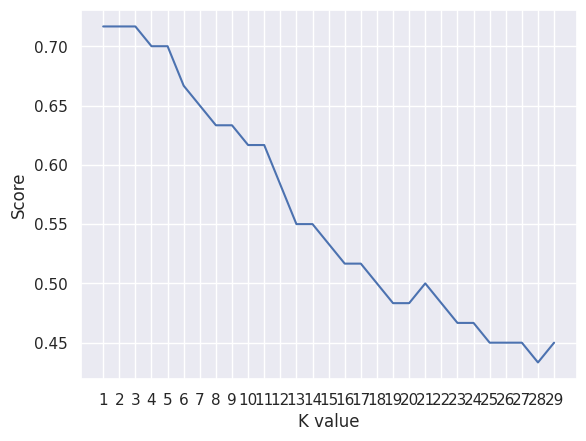

KNN Acc Max 71.67%


In [165]:
scoreListknn = []
for i in range(1,30):
    KNclassifier = KNeighborsClassifier(n_neighbors = i)
    KNclassifier.fit(X_train, y_train)
    scoreListknn.append(KNclassifier.score(X_test, y_test))

plt.plot(range(1,30), scoreListknn)
plt.xticks(np.arange(1,30,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()
KNAccMax = max(scoreListknn)
print("KNN Acc Max {:.2f}%".format(KNAccMax*100))

Support Vector Machine (SVM)

In [166]:
from sklearn.svm import SVC
SVCclassifier = SVC(kernel='linear', max_iter=251)
SVCclassifier.fit(X_train, y_train)

y_pred = SVCclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
SVCAcc = accuracy_score(y_pred,y_test)
print('SVC accuracy is: {:.2f}%'.format(SVCAcc*100))

              precision    recall  f1-score   support

       DrugY       1.00      0.97      0.98        30
       drugA       1.00      1.00      1.00         5
       drugB       0.75      1.00      0.86         3
       drugC       1.00      1.00      1.00         4
       drugX       1.00      1.00      1.00        18

    accuracy                           0.98        60
   macro avg       0.95      0.99      0.97        60
weighted avg       0.99      0.98      0.98        60

[[29  0  1  0  0]
 [ 0  5  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0  4  0]
 [ 0  0  0  0 18]]
SVC accuracy is: 98.33%


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=251).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Naive Bayes

Categorical NB

In [167]:
from sklearn.naive_bayes import CategoricalNB
NBclassifier1 = CategoricalNB()
NBclassifier1.fit(X_train, y_train)

y_pred = NBclassifier1.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
NBAcc1 = accuracy_score(y_pred,y_test)
print('Naive Bayes accuracy is: {:.2f}%'.format(NBAcc1*100))

              precision    recall  f1-score   support

       DrugY       1.00      0.60      0.75        30
       drugA       0.45      1.00      0.62         5
       drugB       1.00      0.67      0.80         3
       drugC       0.57      1.00      0.73         4
       drugX       0.82      1.00      0.90        18

    accuracy                           0.78        60
   macro avg       0.77      0.85      0.76        60
weighted avg       0.87      0.78      0.79        60

[[18  5  0  3  4]
 [ 0  5  0  0  0]
 [ 0  1  2  0  0]
 [ 0  0  0  4  0]
 [ 0  0  0  0 18]]
Naive Bayes accuracy is: 78.33%


Gaussian NB

In [168]:
from sklearn.naive_bayes import GaussianNB
NBclassifier2 = GaussianNB()
NBclassifier2.fit(X_train, y_train)

y_pred = NBclassifier2.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
NBAcc2 = accuracy_score(y_pred,y_test)
print('Gaussian Naive Bayes accuracy is: {:.2f}%'.format(NBAcc2*100))

              precision    recall  f1-score   support

       DrugY       1.00      0.53      0.70        30
       drugA       0.50      1.00      0.67         5
       drugB       0.50      0.67      0.57         3
       drugC       0.57      1.00      0.73         4
       drugX       0.78      1.00      0.88        18

    accuracy                           0.75        60
   macro avg       0.67      0.84      0.71        60
weighted avg       0.84      0.75      0.74        60

[[16  4  2  3  5]
 [ 0  5  0  0  0]
 [ 0  1  2  0  0]
 [ 0  0  0  4  0]
 [ 0  0  0  0 18]]
Gaussian Naive Bayes accuracy is: 75.00%


Decision Tree

In [169]:
from sklearn.tree import DecisionTreeClassifier
DTclassifier = DecisionTreeClassifier(max_leaf_nodes=20)
DTclassifier.fit(X_train, y_train)

y_pred = DTclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
DTAcc = accuracy_score(y_pred,y_test)
print('Decision Tree accuracy is: {:.2f}%'.format(DTAcc*100))

              precision    recall  f1-score   support

       DrugY       1.00      1.00      1.00        30
       drugA       1.00      1.00      1.00         5
       drugB       1.00      1.00      1.00         3
       drugC       1.00      1.00      1.00         4
       drugX       1.00      1.00      1.00        18

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60

[[30  0  0  0  0]
 [ 0  5  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0  4  0]
 [ 0  0  0  0 18]]
Decision Tree accuracy is: 100.00%


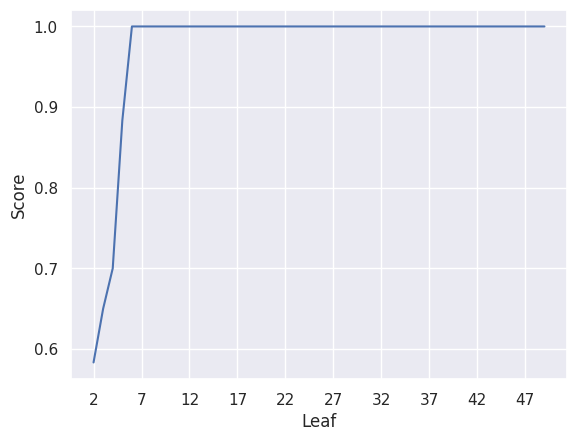

DT Acc Max 100.00%


In [170]:
scoreListDT = []
for i in range(2,50):
    DTclassifier = DecisionTreeClassifier(max_leaf_nodes=i)
    DTclassifier.fit(X_train, y_train)
    scoreListDT.append(DTclassifier.score(X_test, y_test))

plt.plot(range(2,50), scoreListDT)
plt.xticks(np.arange(2,50,5))
plt.xlabel("Leaf")
plt.ylabel("Score")
plt.show()
DTAccMax = max(scoreListDT)
print("DT Acc Max {:.2f}%".format(DTAccMax*100))

Random Forest

In [171]:
from sklearn.ensemble import RandomForestClassifier

RFclassifier = RandomForestClassifier(max_leaf_nodes=30)
RFclassifier.fit(X_train, y_train)

y_pred = RFclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
RFAcc = accuracy_score(y_pred,y_test)
print('Random Forest accuracy is: {:.2f}%'.format(RFAcc*100))

              precision    recall  f1-score   support

       DrugY       1.00      1.00      1.00        30
       drugA       1.00      1.00      1.00         5
       drugB       1.00      1.00      1.00         3
       drugC       1.00      1.00      1.00         4
       drugX       1.00      1.00      1.00        18

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60

[[30  0  0  0  0]
 [ 0  5  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0  4  0]
 [ 0  0  0  0 18]]
Random Forest accuracy is: 100.00%


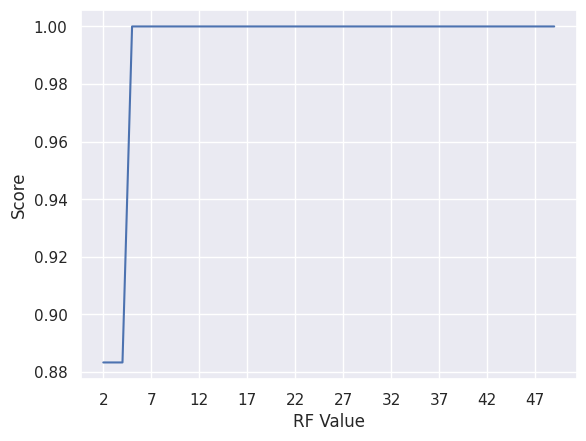

RF Acc Max 100.00%


In [172]:
scoreListRF = []
for i in range(2,50):
    RFclassifier = RandomForestClassifier(n_estimators = 1000, random_state = 1, max_leaf_nodes=i)
    RFclassifier.fit(X_train, y_train)
    scoreListRF.append(RFclassifier.score(X_test, y_test))

plt.plot(range(2,50), scoreListRF)
plt.xticks(np.arange(2,50,5))
plt.xlabel("RF Value")
plt.ylabel("Score")
plt.show()
RFAccMax = max(scoreListRF)
print("RF Acc Max {:.2f}%".format(RFAccMax*100))

 Model Comparison

In [173]:
compare = pd.DataFrame({'Model': ['Logistic Regression', 'K Neighbors', 'K Neighbors Max', 'SVM', 'Categorical NB', 'Gaussian NB', 'Decision Tree', 'Decision Tree Max', 'Random Forest', 'Random Forest Max'],
                        'Accuracy': [LRAcc*100, KNAcc*100, KNAccMax*100, SVCAcc*100, NBAcc1*100, NBAcc2*100, DTAcc*100, DTAccMax*100, RFAcc*100, RFAccMax*100]})
compare.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
8,Random Forest,100.000000
9,Random Forest Max,100.000000
7,Decision Tree Max,100.000000
6,Decision Tree,100.000000
3,SVM,98.333333
0,Logistic Regression,91.666667
4,Categorical NB,78.333333
5,Gaussian NB,75.000000
2,K Neighbors Max,71.666667
1,K Neighbors,48.333333
